#### Importación de bibliotecas

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import mysql.connector
import pandas as pd

def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if name == 'main':
    host = 'localhost'
    user = 'root'
    password = 'rootpassword'
    database = 'transactionsnew'

    db = get_database(host, user, password, database)
    rename_dfs()


NameError: name 'name' is not defined

#### Carga del dataset

In [33]:
file = r"C:\Users\Ivan\Documents\Data_Analytics\Parte8_Simulación_Empresarial\ProjecteData\Equip_E\Data\alojamientos-turisticos-sample.csv"

df = pd.read_csv(file)
df.head()

,apartment_id,md5,name,description,host_id,neighborhood_overview,neighbourhood_name,neighbourhood_district,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,is_instant_bookable,reviews_per_month,country,city,insert_date
0,36187629,66fff4225feb2ddf104ea38f76e4bff1,Piso reformado excelente ubicacion,Apartamento reformado hace dos meses en el Cab...,261787331,NaN,BETERO,POBLATS MARITIMS,39.471490,-0.334600,...,10.0,10.0,10.0,10.0,NaN,True,0.22,spain,valencia,2019-12-31
1,5388904,48790b4dd865e98cc1f5302a2bba1a50,Nice Room in a Penthouse,The apartment is fully equipped. Large bathroo...,20843074,NaN,la Nova Esquerra de l'Eixample,Eixample,41.383530,2.153880,...,8.0,10.0,10.0,10.0,NaN,False,0.01,spain,barcelona,2021-01-12
2,39982406,d3a60e8898bd8ddce4325c8d3d6af7c8,LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA,Luxury Apartment located in a priveleged zone ...,308267305,Very quiet residential area in a Posh area of ...,El Plantío,Moncloa - Aravaca,40.466140,-3.809480,...,NaN,NaN,NaN,NaN,VT-12318,True,NaN,spain,madrid,2020-01-10
3,19344018,e2f33bae8c814924e8ce7e6efa8e7245,Habitación zona Atocha,Pareja joven alquila habitación para semana de...,135531703,NaN,Palos de Moguer,Arganzuela,40.405070,-3.693183,...,NaN,NaN,NaN,NaN,NaN,True,NaN,spain,madrid,2019-01-14
4,17218380,11295740bea58c9ae080a459cc8094c5,Spacious villa for rent with private pool,This large holiday home is located in a quiet ...,8345284,L'Escala has a strategic location - everything...,L'Escala,NaN,42.107823,3.141601,...,8.0,9.0,8.0,8.0,HUTG-020958,True,0.29,spain,girona,2018-10-20


#### Exploración inicial

In [34]:
# tamaño
df.shape

(10000, 40)

In [35]:
# tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   md5                          10000 non-null  object 
 2   name                         9997 non-null   object 
 3   description                  9862 non-null   object 
 4   host_id                      10000 non-null  int64  
 5   neighborhood_overview        5899 non-null   object 
 6   neighbourhood_name           10000 non-null  object 
 7   neighbourhood_district       6079 non-null   object 
 8   latitude                     10000 non-null  float64
 9   longitude                    10000 non-null  float64
 10  room_type                    10000 non-null  object 
 11  accommodates                 10000 non-null  int64  
 12  bathrooms                    9926 non-null   float64
 13  bedrooms         

In [36]:
# valores nulos
df.isnull().sum()

apartment_id                      0
md5                               0
name                              3
description                     138
host_id                           0
neighborhood_overview          4101
neighbourhood_name                0
neighbourhood_district         3921
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                    0
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating        

In [37]:
# duplicados
df.duplicated().sum()

0


 Distribución Variables Numéricas:

                              Media  Desviación estándar  Mínimo  Q1 (25%)  \
latitude                      40.40                 1.42   36.65     39.71   
longitude                      0.28                 3.22   -6.03     -3.70   
accommodates                   4.27                 2.58    1.00      2.00   
bathrooms                      1.60                 0.99    0.00      1.00   
bedrooms                       1.94                 1.37    0.00      1.00   
beds                           2.92                 2.26    0.00      1.00   
price                        101.21                86.10    6.00     45.00   
minimum_nights                 4.95                17.73    1.00      1.00   
maximum_nights               759.77               498.37    1.00     62.00   
availability_30               13.01                11.84    0.00      0.00   
availability_60               28.76                22.97    0.00      2.00   
availability_90            

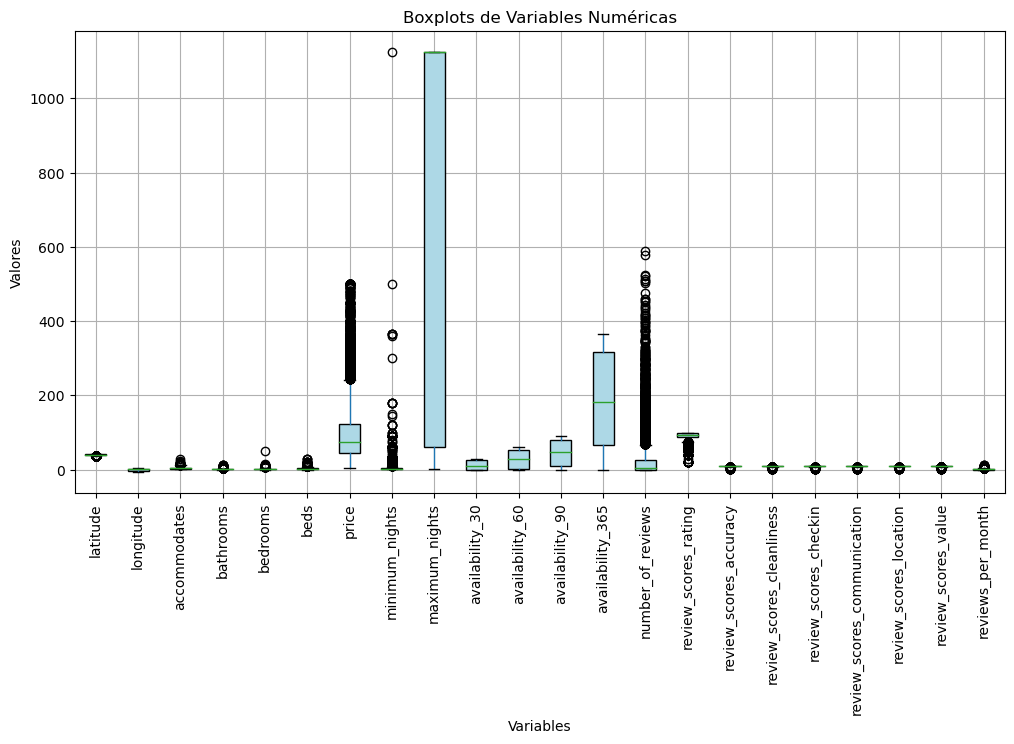

In [38]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas)

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

La distribución del precio revela una clara diferenciación entre los alojamientos estándar y los outliers, que corresponden a alojamientos de lujo. En cuanto a la variable maximum_nights, se observa que la mayoría de los alojamientos han tenido casos de clientes que se han hospedado durante un período prolongado, con una mediana que supera los 1000 días.

Por otro lado, en minimum_nights se detecta un outlier que supera los 1000 días, lo que podría deberse a que el alojamiento apenas recibe huéspedes o a un posible error de registro.

En cuanto a las columnas de disponibilidad a lo largo del tiempo, se aprecia que, a medida que el intervalo de tiempo se amplía, también lo hace la varianza, lo que sugiere la presencia de estacionalidad en la demanda de alojamientos.

El número de reviews presenta numerosos outliers, pero dado que no se dispone de información sobre los años, es posible que esta variable no sea demasiado explicativa. En contraste, la métrica reviews_per_month permitiría evaluar mejor el feedback de los huéspedes.

HAY AÑO!!! en insert_date.

# LIMPIEZA DE DATOS

In [39]:
# valores nulos
df.isnull().sum()

apartment_id                      0
md5                               0
name                              3
description                     138
host_id                           0
neighborhood_overview          4101
neighbourhood_name                0
neighbourhood_district         3921
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms                        74
bedrooms                         70
beds                             45
amenities_list                    0
price                           254
minimum_nights                    0
maximum_nights                    0
has_availability                550
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2604
last_review_date               2605
review_scores_rating        

In [ ]:
# MEJORAS DE LIMPIEZA(Posibles)

# Tratado: has_availability(binaria), neighbourhood_district(categorica), description, neighborhood_overview y license eliminadas

# Analizado no tratado: reviews_per_month

# PENDIENTE DE DECIDIR COMO TRATAR
#  En duda: name

# bathrooms, bedrroms, beds son parecidos pocos nulos y seguramente si no se anuncian es porque estan en el minimo indispensable(yo substituiria por min)

# Variables referentes a reviews(tienen numero de nulos similares, por lo que seguramente estan relacionados)

In [ ]:
# Eliminar columnas 'description','neighborhood_overview', 'license'
df = df.drop(columns=['description', 'neighborhood_overview','license'])

In [54]:
# Análisis de nulos de reviews_per_month

df_nulos = df[df['reviews_per_month'].isna()]
df_nulos[['reviews_per_month','number_of_reviews']].tail(10)

,reviews_per_month,number_of_reviews
9966,NaN,0
9969,NaN,0
9971,NaN,0
9972,NaN,0
9973,NaN,0
9978,NaN,0
9979,NaN,0
9983,NaN,0
9986,NaN,0
9990,NaN,0


Se observa que la mayoría de los valores nulos en reviews_per_month están justificados, ya que corresponden a alojamientos que no han recibido ninguna reseña.

In [ ]:
# Averiguar si hay algún valor nulo con reseña
print((df_nulos['number_of_reviews'] > 0).any())


True


In [ ]:
# Crear tabla de aquellos nulos con reseñas
df_nulos_filtrados = df_nulos[df_nulos['number_of_reviews'] > 0]
df_nulos_filtrados[['name', 'number_of_reviews', 'reviews_per_month']]



,name,number_of_reviews,reviews_per_month
548,Club Villamar - Gomez,1,NaN
3796,Single room luminous Sagrada Familia WIFI new ...,1,NaN
4457,Habitacion para disfrutar un descanso conforta...,1,NaN


Existen 3 alojamientos que tienen 1 review, pero presentan valores nulos en reviews_per_month.

In [ ]:
# Analisis del resto de columnas de reviews

# Seleccionar solo las columnas de interés
cols_reviews = [
    'first_review_date', 'last_review_date', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]

# Filtrar filas donde TODAS las columnas están nulas
df_todas_nulas = df[df[cols_reviews].isnull().all(axis=1)]

# Filtrar filas donde ALGUNA columna está nula, pero no todas
df_parcialmente_nulas = df[df[cols_reviews].isnull().any(axis=1) & ~df[cols_reviews].isnull().all(axis=1)]

# Mostrar el número de filas en cada caso
print(f"Filas con nulos en TODAS las columnas: {len(df_todas_nulas)}")
print(f"Filas con nulos en ALGUNAS columnas, pero no en todas: {len(df_parcialmente_nulas)}")

Filas con nulos en TODAS las columnas: 2603
Filas con nulos en ALGUNAS columnas, pero no en todas: 128


La mayoría de los valores nulos se repiten en todas las columnas, con un total de 2603 filas completamente nulas, mientras que solo 128 filas presentan nulos en algunas columnas.

In [60]:
# Verificar si todas las filas en df_todas_nulas tienen number_of_reviews == 0
todas_nulas_son_cero = (df_todas_nulas['number_of_reviews'] == 0).all()

print(f"¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: {todas_nulas_son_cero}")

¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: False


In [44]:
# Locales duplicados
df['name'].duplicated().sum()

331

Hay 331 locales duplicados.

In [45]:
# Frecuencia de los locales
duplicados = df['name'].value_counts()
duplicados = duplicados[duplicados > 1]  # Filtrar solo los que están duplicados

print(duplicados)

name
Beautiful two bedroom appartment with comunitary swiming-pool    4
Schönes Zimmer auf grosser Finca                                 3
Apartaments Ponent 1 habitacion                                  3
Apartamento INTERIOR Eslava 4                                    3
Amazing villa with swimming-pool                                 3
                                                                ..
Beautifull, lighting and cozy apartament                         2
Spacious n´bright room in Madrid Center                          2
#Artsy_Fartsy- museum triangle + patio oasis                     2
AP Costas - Treumal Park / One Bedroom                           2
SUNNY PENTHOUSE CENTER                                           2
Name: count, Length: 318, dtype: int64


Se observan errores en los nombres, como el hecho de que el más repetido sea una descripción genérica en lugar de un nombre único de alojamiento.



In [46]:
# Substituir los NA por False
df['has_availability'] = df['has_availability'].fillna(False)

In [47]:
df['has_availability'].unique()

array([ True, False])

In [ ]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

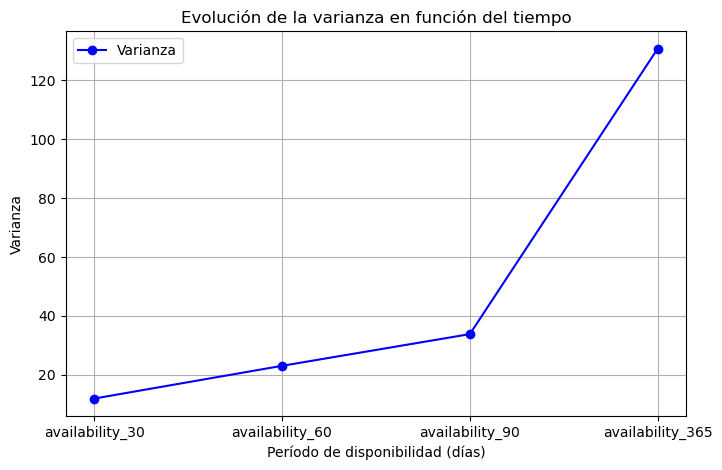

In [59]:
import matplotlib.pyplot as plt

# Datos de varianza (según los valores que compartiste)
periodos = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
varianzas = [11.84, 22.97, 33.75, 130.78]  # Valores de varianza

# Graficar la tendencia de la varianza
plt.figure(figsize=(8, 5))
plt.plot(periodos, varianzas, marker='o', linestyle='-', color='b', label="Varianza")
plt.xlabel("Período de disponibilidad (días)")
plt.ylabel("Varianza")
plt.title("Evolución de la varianza en función del tiempo")
plt.grid(True)
plt.legend()
plt.show()